<a href="https://colab.research.google.com/github/lumagallacio/codenation-data-science-2020/blob/master/enem_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('train.csv', encoding="UTF8")
df_test = pd.read_csv('test.csv', encoding="UTF8")

Deixar os dados de treinamento com as mesmas colunas que os dados de teste

In [0]:
features_all = pd.concat([pd.Series(df_test.columns), pd.Series(['NU_NOTA_MT'])]).tolist()
features_all
df_train = df_train.loc[:, features_all]

Removo colunas com dados irrelevantes (como número de inscrição) e atributos com muitos valores vazios

In [0]:
def resume_missing_data(df_train):
  total = df_train.isnull().sum().sort_values(ascending=False)
  percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  print(missing_data.head(100))

resume_missing_data(df_train)

del df_train['TP_DEPENDENCIA_ADM_ESC']
del df_train['TP_ENSINO']
del df_train['Q027']
del df_train['NU_INSCRICAO']
del df_train['SG_UF_RESIDENCIA']
del df_train['CO_PROVA_CN']
del df_train['CO_PROVA_CH']
del df_train['CO_PROVA_LC']
del df_train['CO_PROVA_MT']

                        Total   Percent
TP_DEPENDENCIA_ADM_ESC   9448  0.688128
TP_ENSINO                9448  0.688128
Q027                     7373  0.536999
NU_NOTA_MT               3597  0.261981
NU_NOTA_COMP5            3597  0.261981
NU_NOTA_LC               3597  0.261981
TP_STATUS_REDACAO        3597  0.261981
NU_NOTA_COMP2            3597  0.261981
NU_NOTA_COMP3            3597  0.261981
NU_NOTA_COMP4            3597  0.261981
NU_NOTA_COMP1            3597  0.261981
NU_NOTA_REDACAO          3597  0.261981
NU_NOTA_CH               3389  0.246832
NU_NOTA_CN               3389  0.246832
TP_ESCOLA                   0  0.000000
IN_SURDEZ                   0  0.000000
IN_CEGUEIRA                 0  0.000000
IN_BAIXA_VISAO              0  0.000000
CO_UF_RESIDENCIA            0  0.000000
IN_TREINEIRO                0  0.000000
SG_UF_RESIDENCIA            0  0.000000
TP_ANO_CONCLUIU             0  0.000000
TP_NACIONALIDADE            0  0.000000
NU_IDADE                    0  0.000000


In [0]:
resume_missing_data(df_train)

                   Total   Percent
NU_NOTA_MT          3597  0.261981
NU_NOTA_REDACAO     3597  0.261981
NU_NOTA_LC          3597  0.261981
TP_STATUS_REDACAO   3597  0.261981
NU_NOTA_COMP1       3597  0.261981
NU_NOTA_COMP3       3597  0.261981
NU_NOTA_COMP4       3597  0.261981
NU_NOTA_COMP5       3597  0.261981
NU_NOTA_COMP2       3597  0.261981
NU_NOTA_CH          3389  0.246832
NU_NOTA_CN          3389  0.246832
TP_ANO_CONCLUIU        0  0.000000
TP_ST_CONCLUSAO        0  0.000000
TP_NACIONALIDADE       0  0.000000
IN_DISCALCULIA         0  0.000000
TP_COR_RACA            0  0.000000
TP_SEXO                0  0.000000
TP_ESCOLA              0  0.000000
NU_IDADE               0  0.000000
IN_TREINEIRO           0  0.000000
IN_BAIXA_VISAO         0  0.000000
IN_CEGUEIRA            0  0.000000
IN_SURDEZ              0  0.000000
IN_DISLEXIA            0  0.000000
TP_PRESENCA_LC         0  0.000000
IN_SABATISTA           0  0.000000
IN_GESTANTE            0  0.000000
IN_IDOSO            

Removo as notas 0 dos dados (missing values e 0s)

In [0]:
df_train = df_train.fillna(0)
df_train = df_train[(df_train.NU_NOTA_MT>0)]
resume_missing_data(df_train)

                   Total  Percent
NU_NOTA_MT             0      0.0
IN_BAIXA_VISAO         0      0.0
IN_IDOSO               0      0.0
IN_GESTANTE            0      0.0
IN_SABATISTA           0      0.0
IN_DISCALCULIA         0      0.0
IN_DISLEXIA            0      0.0
IN_SURDEZ              0      0.0
IN_CEGUEIRA            0      0.0
IN_TREINEIRO           0      0.0
TP_PRESENCA_CH         0      0.0
TP_ESCOLA              0      0.0
TP_ANO_CONCLUIU        0      0.0
TP_ST_CONCLUSAO        0      0.0
TP_NACIONALIDADE       0      0.0
TP_COR_RACA            0      0.0
TP_SEXO                0      0.0
NU_IDADE               0      0.0
TP_PRESENCA_CN         0      0.0
TP_PRESENCA_LC         0      0.0
Q047                   0      0.0
NU_NOTA_COMP5          0      0.0
Q026                   0      0.0
Q025                   0      0.0
Q024                   0      0.0
Q006                   0      0.0
Q002                   0      0.0
Q001                   0      0.0
NU_NOTA_REDACA

Teremos uma distribuição aparentemente com assimetria positiva

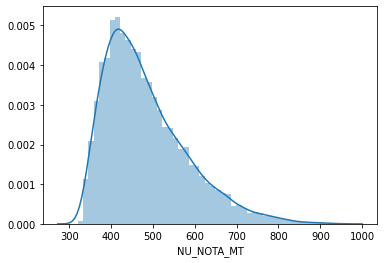

In [0]:
df_train['NU_NOTA_MT'].describe()
sns.distplot(df_train['NU_NOTA_MT']);

Transformo dados de texto em números

In [0]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for x in ['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']:
    df_train[str(x)] = label_encoder.fit_transform(df_train[str(x)])  
    
for x in ['TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']:
    df_test[str(x)] = label_encoder.fit_transform(df_test[str(x)]) 
    

Escolho atributos que serão usados baseado na correlação

In [0]:
print(df_train.corr()['NU_NOTA_MT'].sort_values())

cols = [
'Q006',
'Q047',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_REDACAO',
'TP_SEXO',
'TP_COR_RACA',
'CO_UF_RESIDENCIA',
'NU_NOTA_MT',
'NU_IDADE'
]

df_train = df_train.loc[:, cols]
# df_test = df_test.loc[:, cols]

TP_LINGUA           -0.204975
TP_COR_RACA         -0.161076
TP_ST_CONCLUSAO     -0.088442
NU_IDADE            -0.061558
TP_STATUS_REDACAO   -0.055437
TP_NACIONALIDADE    -0.036235
IN_TREINEIRO        -0.023216
Q026                -0.016767
IN_SURDEZ           -0.015524
IN_SABATISTA        -0.012309
IN_IDOSO            -0.011517
IN_GESTANTE         -0.001052
IN_BAIXA_VISAO       0.000534
IN_DISLEXIA          0.001422
IN_DISCALCULIA       0.009881
TP_PRESENCA_CN       0.012103
TP_PRESENCA_CH       0.012103
TP_ANO_CONCLUIU      0.027828
TP_ESCOLA            0.070875
CO_UF_RESIDENCIA     0.107839
Q001                 0.171572
TP_SEXO              0.186655
Q002                 0.214059
Q025                 0.246882
NU_NOTA_COMP1        0.298654
Q024                 0.325598
NU_NOTA_COMP2        0.335449
NU_NOTA_COMP4        0.341176
NU_NOTA_COMP5        0.344745
NU_NOTA_COMP3        0.350752
Q047                 0.353296
NU_NOTA_REDACAO      0.379523
Q006                 0.412122
NU_NOTA_LC

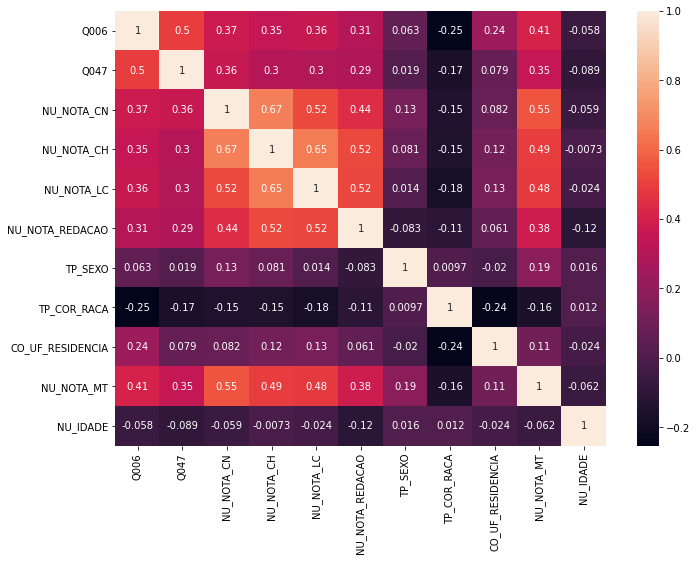

In [0]:
corr = df_train.corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

# Treinando o modelo

SandardScaler vai transformar os dados de forma que sua distribuição terá um valor médio 0 e um desvio padrão de 1

In [0]:
features= df_train.columns.tolist()
features.remove('NU_NOTA_MT')

y_train = pd.DataFrame(df_train['NU_NOTA_MT'])
x_train = df_train[features]
x_test = df_test[features].fillna(0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

Regressão Linear

In [0]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model 
regr.fit(x_train, df_train['NU_NOTA_MT'])

# Make predictions 
y_pred_train = regr.predict(x_train)
# y_pred_test = regr.predict(x_test)

#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE ', rmse)

RMSE  75.40553062129578


Regressão Polinomial

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly, y_train)

y_poly_pred = model.predict(x_poly)
y_pred_test = model.predict(x_poly_test)

#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, y_poly_pred))
print('RMSE ', rmse)

RMSE  71.67713681251492


In [0]:
for index, row  in df_test.iterrows():
    if row['TP_PRESENCA_LC']==0:
        y_pred_test[index] = 0
        
answer=pd.DataFrame()
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
answer['NU_NOTA_MT'] = y_pred_test 
answer
answer.to_csv(r'answer.csv', index = False)

RandomForest

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=10,
           max_leaf_nodes=None,
           max_features= 'sqrt',
           min_impurity_split=None,
           min_samples_leaf=5,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           bootstrap= True,
           warm_start=False
)

regressor.fit(x_train, y_train)

# y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

Verifico quais atributos foram mais relevantes pro modelo

Index(['Q006', 'Q047', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_REDACAO', 'TP_SEXO', 'TP_COR_RACA', 'CO_UF_RESIDENCIA',
       'NU_NOTA_MT', 'NU_IDADE'],
      dtype='object')
                   0         0
0               Q006  0.060782
1               Q047  0.036741
2         NU_NOTA_CN  0.314762
3         NU_NOTA_CH  0.246621
4         NU_NOTA_LC  0.167594
5    NU_NOTA_REDACAO  0.066833
6            TP_SEXO  0.027780
7        TP_COR_RACA  0.013620
8   CO_UF_RESIDENCIA  0.034732
9         NU_NOTA_MT  0.030535
10          NU_IDADE       NaN


Text(0.5, 1.0, 'Importância de cada feature')

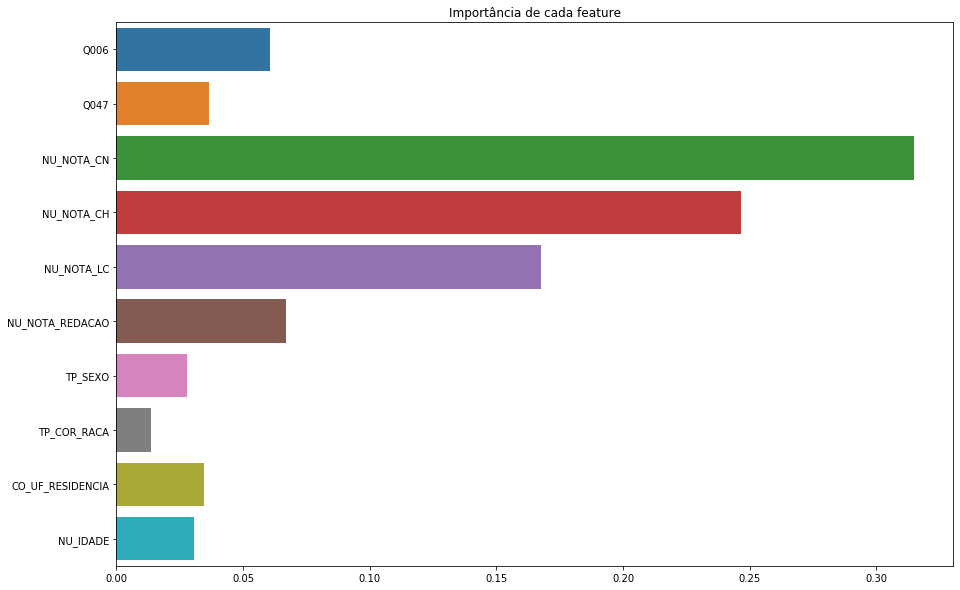

In [0]:
print(df_train.columns)
regressor.feature_importances_
print(pd.concat([pd.DataFrame(df_train.columns), pd.DataFrame(regressor.feature_importances_)], axis=1))

importances = pd.Series(data=regressor.feature_importances_, index=features)
plt.subplots(figsize=(15, 10))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Nesse caso, treinei o modelo com todos os atributos para ver quais tinham mais importância pro modelo

Index(['CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q047', 'NU_NOTA_MT'],
      dtype='object')
                    0         0
0    CO_UF_RESIDENCIA  0.021283
1            NU_IDADE  0.015176
2             TP_SEXO  0.020888
3         TP_COR_RACA  0.007047
4    TP_NACIONALIDADE  0.001376
5     TP_ST_CONCLUSAO  0.002762
6     TP_ANO_CONCLUIU  0.007054
7           TP_ESCOLA  0.004533
8        IN_TREINEIRO  0.001011
9      IN_BAIXA_VISAO  

Text(0.5, 1.0, 'Importância de cada feature')

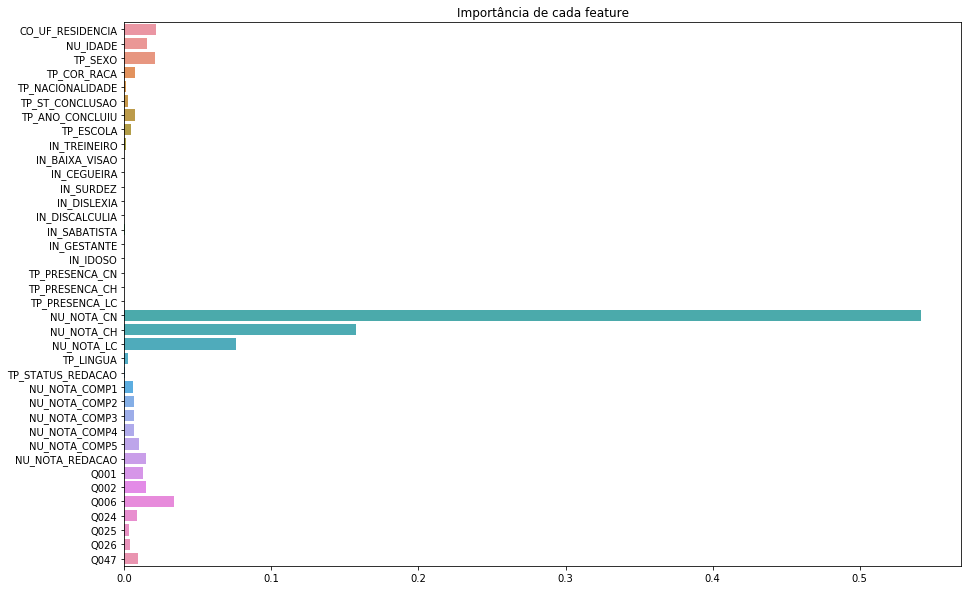

In [0]:
print(df_train.columns)
regressor.feature_importances_
# print(pd.concat([pd.DataFrame(df_train.columns), pd.DataFrame(regressor.feature_importances_)], axis=1))
print(pd.concat([pd.DataFrame(df_train.columns), pd.DataFrame(regressor.feature_importances_)], axis=1))

importances = pd.Series(data=regressor.feature_importances_, index=features)
plt.subplots(figsize=(15, 10))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [0]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE ', rmse)

RMSE  64.39398911316081


Para salvar os dados verifica-se que se o aluno faltou na prova de Linguagens e Códigos ele também faltou na prova de Matemática e portanto sua nota é 0

In [0]:
for index, row  in df_test.iterrows():
    if row['TP_PRESENCA_LC']==0:
        y_pred_test[index] = 0
        
answer=pd.DataFrame()
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
answer['NU_NOTA_MT'] = y_pred_test 
answer
answer.to_csv(r'answer.csv', index = False)

O Grid vai procurar os melhores hiperparâmetros pro modelo de Random Forest

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
            'n_estimators': [100, 300, 500],
             'max_features': ['auto','sqrt'],
             'bootstrap': [True, False],
             'max_depth': [6, 10, 15, 20],
             'min_samples_leaf': [5,7,10]
    },
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(x_train, y_train)
best_params = grid_result.best_params_
best_params

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 300}

# Rede Neural

Teste com redes neuras

In [0]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               8064      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 172,929
Trainable params: 172,929
Non-trainable params: 0
_________________________________________________________________


In [0]:
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)

In [0]:
y_pred_train = NN_model.predict(x_train)
# y_pred_test = NN_model.predict(x_test)

#RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE ', rmse)

for index, row  in df_test.iterrows():
    if row['TP_PRESENCA_LC']==0:
        y_pred_test[index] = 0
        
answer=pd.DataFrame()
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
answer['NU_NOTA_MT'] = y_pred_test 
answer
answer.to_csv(r'answer.csv', index = False)

RMSE  45.74406254074982
